In [ ]:
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import cm
from matplotlib.colors import Normalize

DATA_DIR = 'Data/'
FIG_DIR = 'Results/3.4/'
data_name = [r'2M_0.02/summary.txt',r'30M_0.02/summary.txt']


plt.style.use('matplotlib.mplstyle')

col_names = ['Step','t','M','LogL','LogR',
                 'LogTs','LogTc','Logrhoc','logPc','psic',
                 'Xc','Yc','XCc','XNc','XOc',
                 'taudyn','tauKH','taunuc','Lpp','LCNO',
                 'L3a','LZ','Lv','MHe','MC',
                 'MO','RHe','RC','RO']

col_names_structure = ['Mr','r','Lr','P','rho',
                 'T','U','S','Cp','adia1',
                 'nablaad','mu','ne','Pe','Pr',
                 'nablarad','nabla','vc','kappa','epsnuc',
                 'epspp','epscno','eps3alpha','epsvnuc','epsv', 'epsgrav',
                 'X','-','X+','Y', 'Y+', 'Y++', 'XC', 'XN', 'XO', 'Psi']

plot_title = [r'$2\mathrm{M_\odot}$',r'$30\mathrm{M_\odot}$']

0
1


C:\Users\beepp\AppData\Local\Temp\ipykernel_12252\1018363956.py:22: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


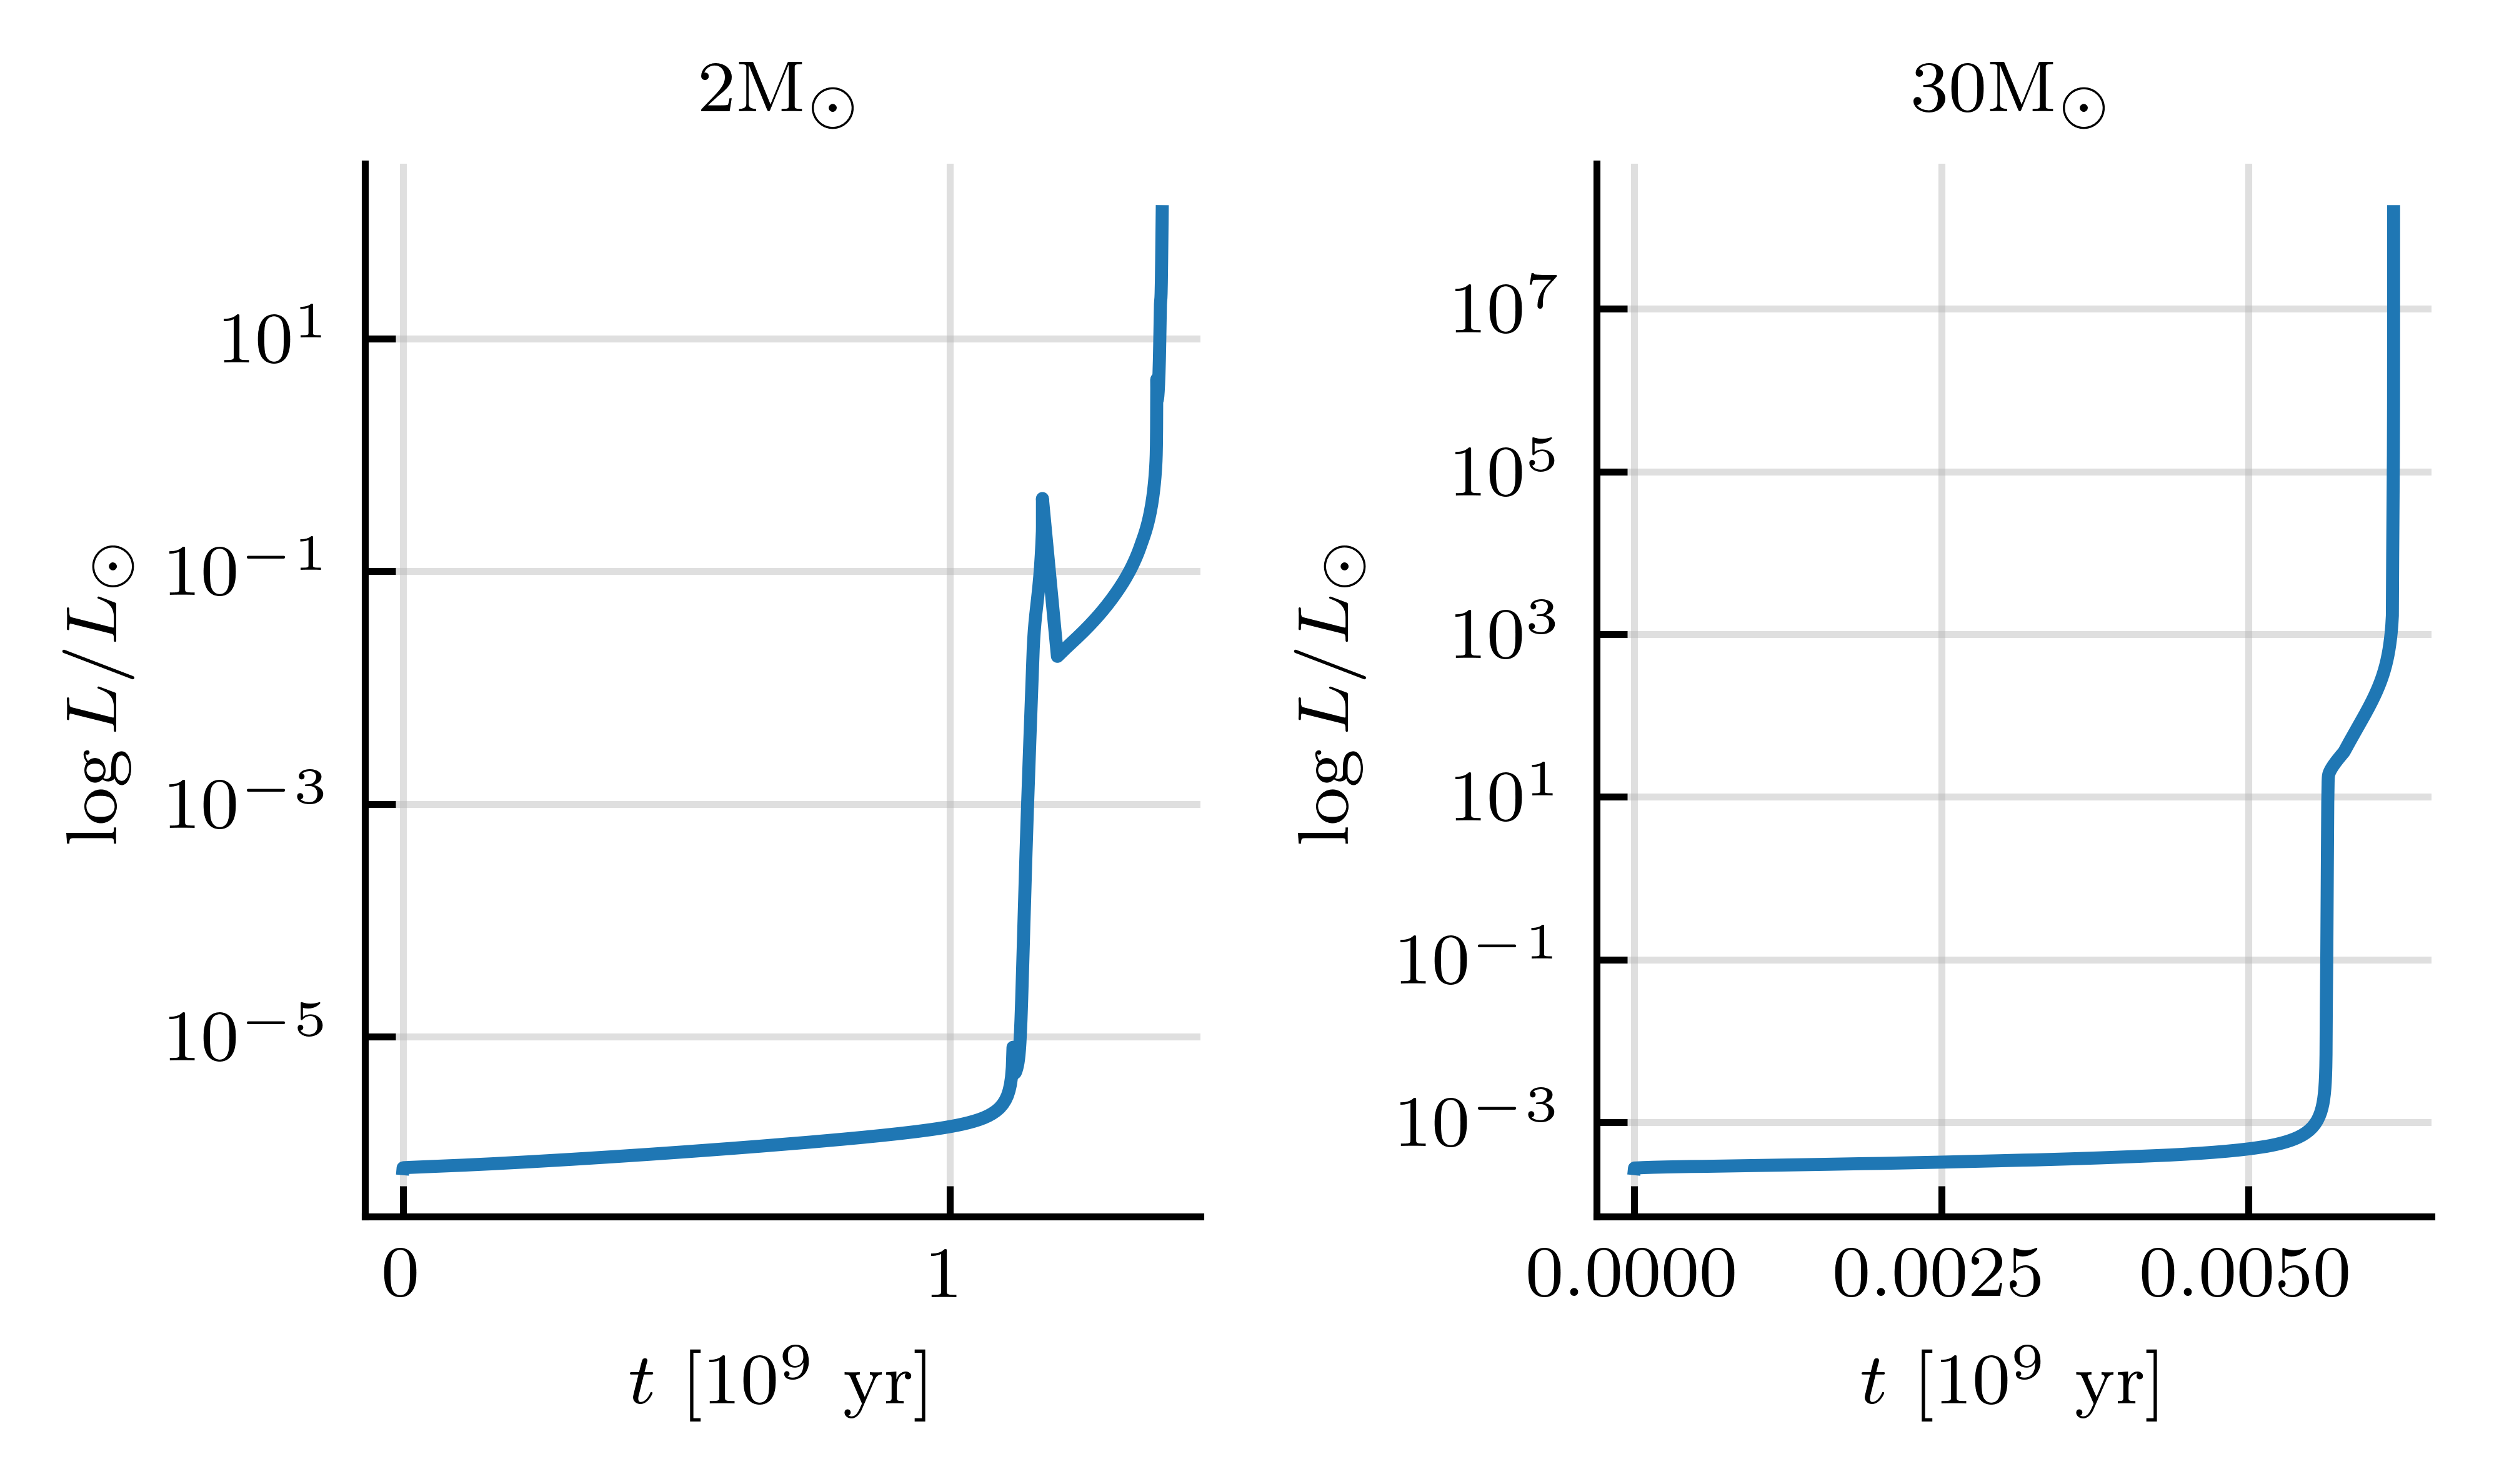

In [ ]:
# Separate subplots for each star

def plot_neutrino(data_files, data_dir):
    fig, axs = plt.subplots(1,2)
    
    for i, data_name in enumerate(data_files):
        print(i)
        df = pd.read_csv(data_dir + data_name, sep=r'\s+', header=None)
        df.columns = col_names
        df.drop(columns=['Step'], inplace=True)
        
        
        axs[i].semilogy(df['t'] / 1e9, df['Lv'], label = plot_title[i])

        axs[i].set_ylabel(r"$\log L/L_\odot$")
        axs[i].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
        
        axs[i].set_title(rf"{plot_title[i]}")
        axs[i].grid(which='both', alpha=0.4, visible=True)
        
    #fig.suptitle(r'Luminosity of neutrino losses, $L_{\mathrm{v}}$')
    plt.tight_layout()
    plt.savefig(FIG_DIR+'Neutrino.pdf',bbox_inches='tight')
    plt.show()

plot_neutrino(data_name, DATA_DIR)

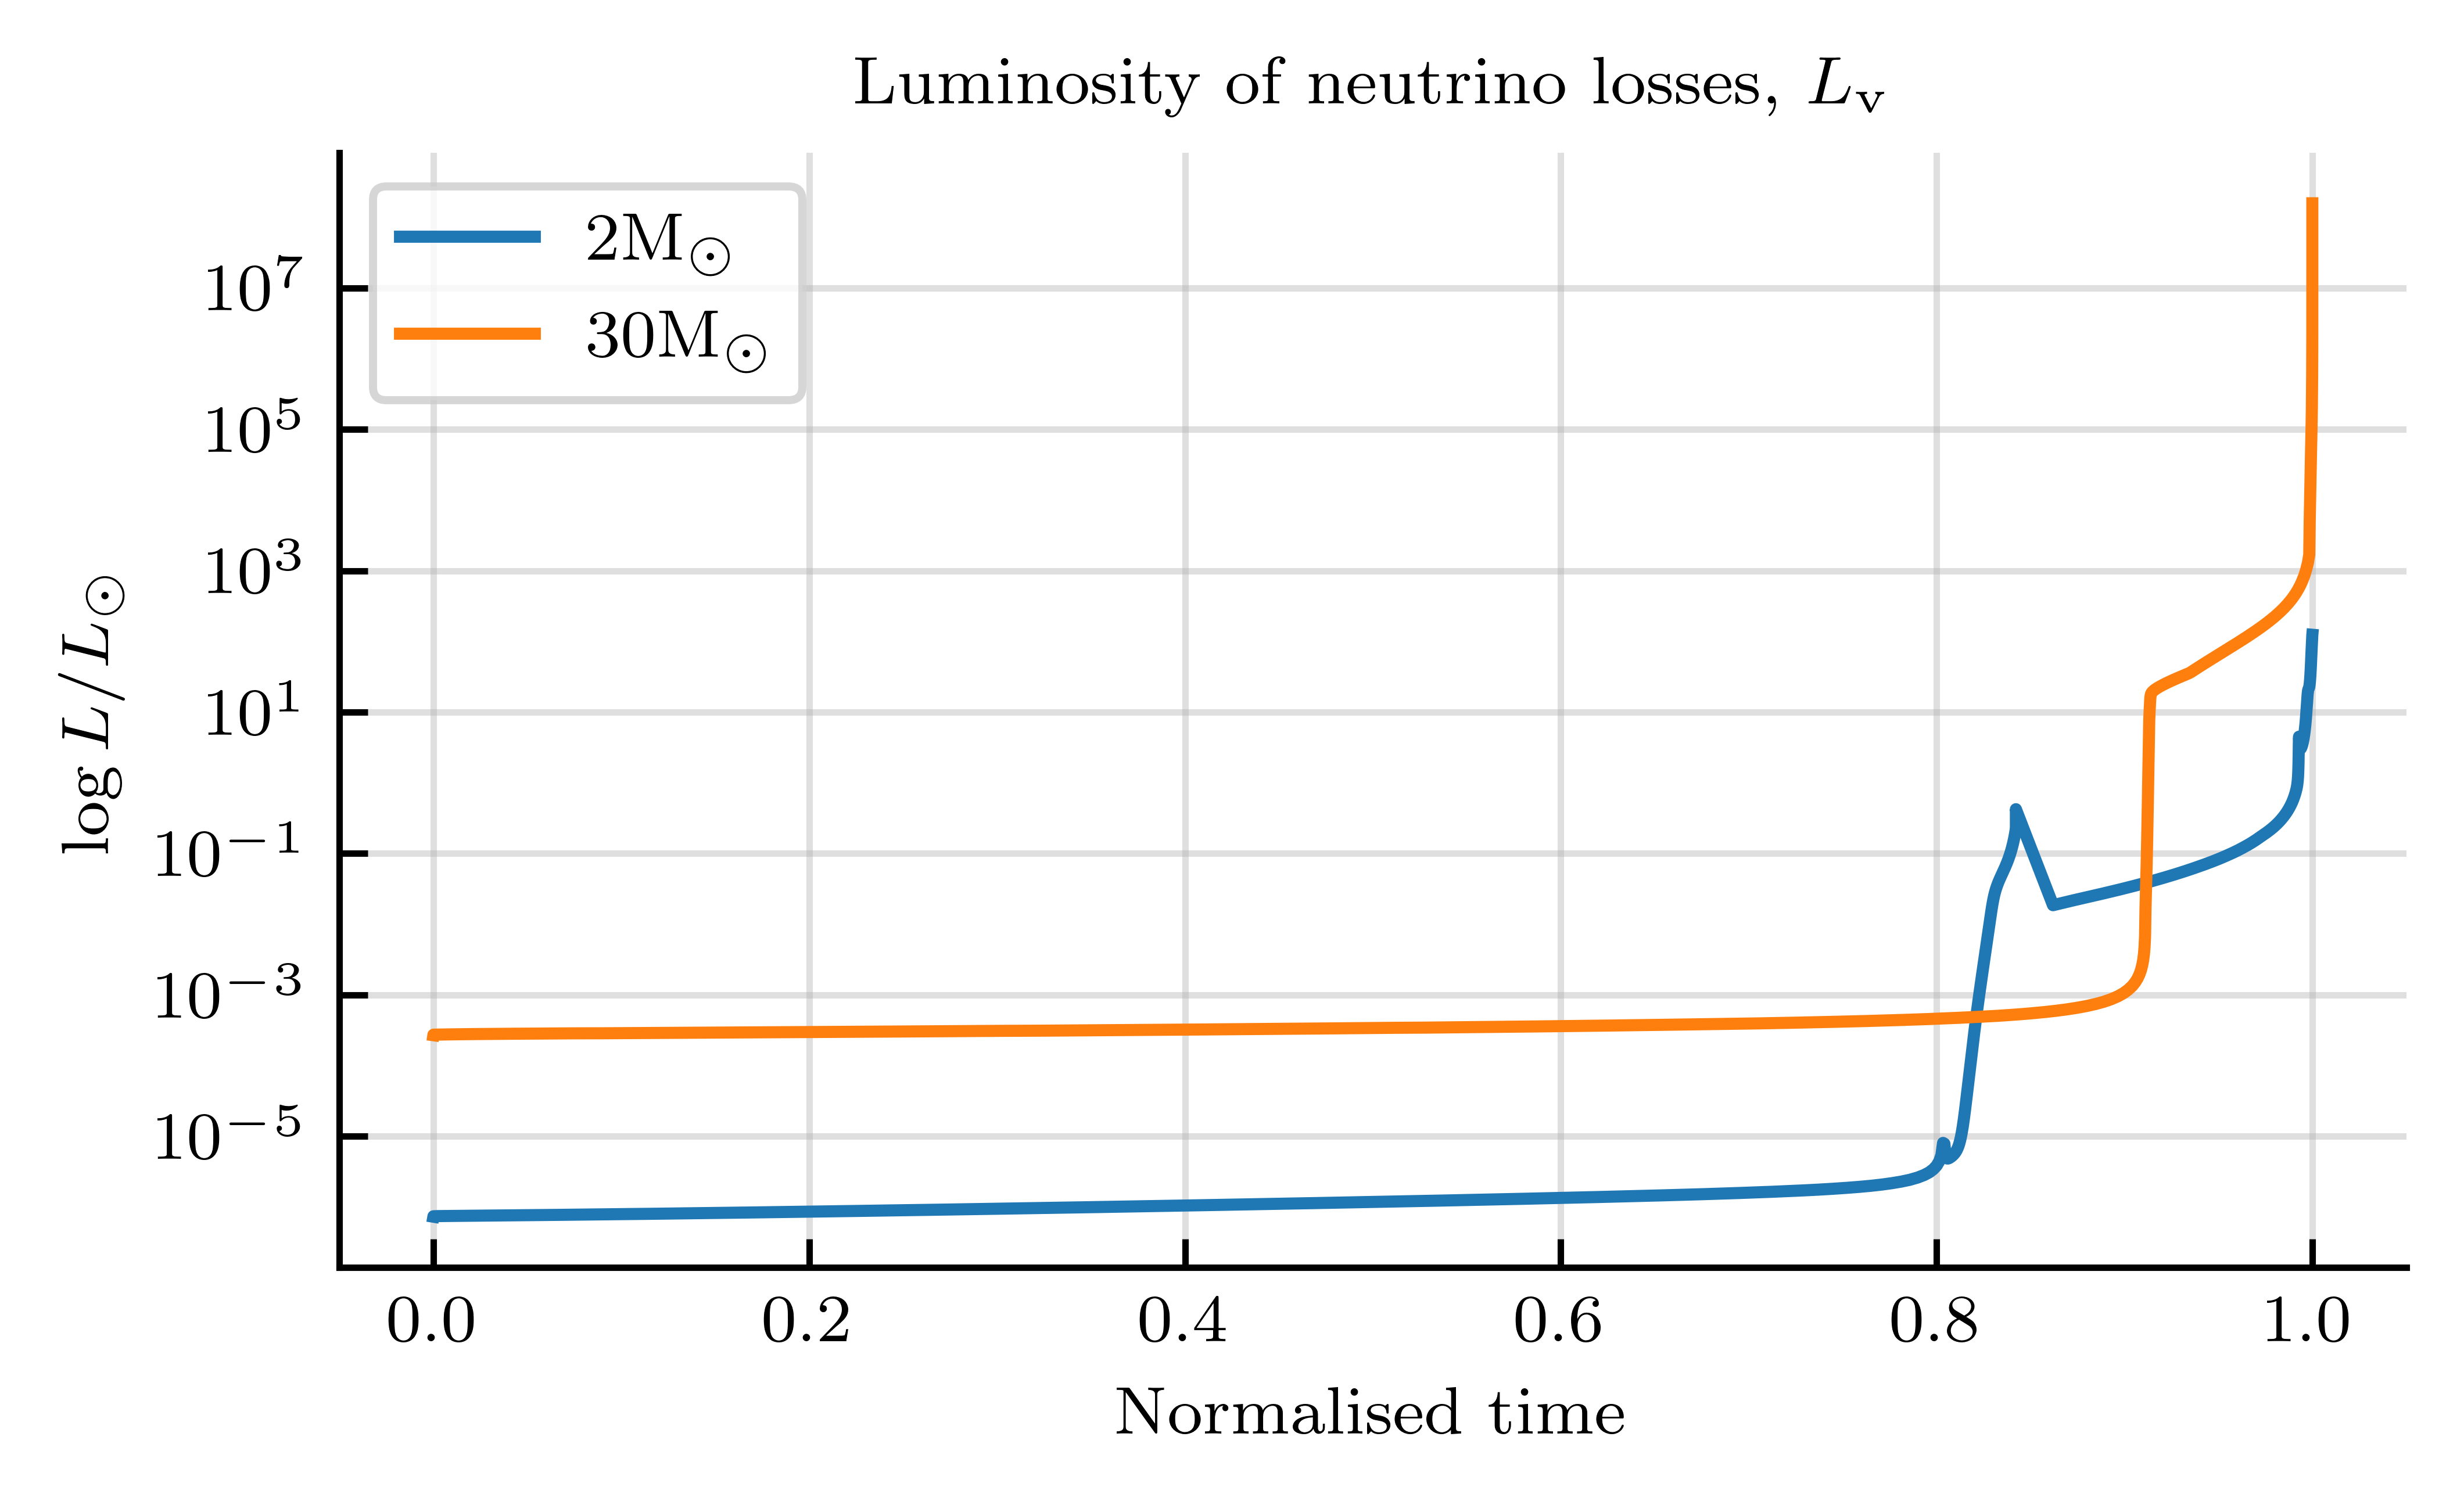

In [3]:
# A single plot for both with normalized time-axis

def plot_neutrino_together(data_files, data_dir):
    for i, data_name in enumerate(data_files):
        df = pd.read_csv(data_dir + data_name, sep=r'\s+', header=None)
        df.columns = col_names
        df.drop(columns=['Step'], inplace=True)
        
        
        plt.semilogy(df['t'] / max(df['t']), df['Lv'], label = plot_title[i])
        
        plt.ylabel(r"$\log L/L_\odot$")
        plt.xlabel(r"Normalised time")
        
        plt.title(r'Luminosity of neutrino losses, $L_{\mathrm{v}}$')
        plt.grid(which='both', alpha=0.4, visible=True)
        plt.legend()
    plt.savefig(FIG_DIR+'Neutrino together.pdf',bbox_inches='tight')
    plt.show()

plot_neutrino_together(data_name, DATA_DIR)